In [1]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import log_loss
import pickle
from tqdm import trange
from utils import *

In [2]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
 
# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [3]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28))
testX = testX.reshape((testX.shape[0], 28 * 28))

In [4]:
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=42)

In [5]:
def train_model(model, epochs, n_iter_no_change = 10, early_stopping = True, tol = 1e-4):
    train_loss = []
    validation_loss = []
    for epoch in trange(epochs):
        model.partial_fit(trainX, trainy, classes=np.unique(trainy))
        train_loss.append(model.loss_)
        validation_loss.append(log_loss(valy, model.predict_proba(valX)))
        # Early stopping
        if early_stopping:
            if epoch > n_iter_no_change:
                if np.mean(validation_loss[-n_iter_no_change:]) - validation_loss[-1] < tol:
                    break
    return model, train_loss, validation_loss

## 1

In [7]:
# mlp_sigmoid = MLPClassifier(hidden_layer_sizes=(256, 32), activation='logistic', batch_size=64, random_state=1)

# mlp_sigmoid, train_loss_sigmoid, validation_loss_sigmoid = train_model(mlp_sigmoid, 200)

# # Save the model
# filename = 'mlp_sigmoid.sav'
# pickle.dump(mlp_sigmoid, open(f'Model_Saves/{filename}', 'wb'))

# # Save the losses
# filename = 'mlp_sigmoid_losses.sav'
# pickle.dump((train_loss_sigmoid, validation_loss_sigmoid), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_sigmoid = pickle.load(open(f'Model_Saves/mlp_sigmoid.sav', 'rb'))

# Load the losses
train_loss_sigmoid, validation_loss_sigmoid = pickle.load(open(f'Model_Saves/mlp_sigmoid_losses.sav', 'rb'))

print("Accuracy with Sigmoid Activation: ", mlp_sigmoid.score(testX, testy))

Accuracy with Sigmoid Activation:  0.742


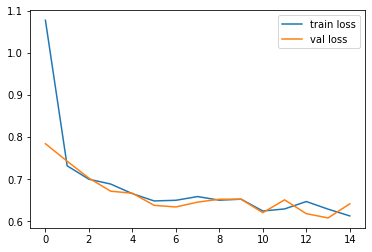

In [8]:
plot_curves(train_loss_sigmoid, validation_loss_sigmoid)

In [9]:
# mlp_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

# mlp_relu, train_loss_relu, validation_loss_relu = train_model(mlp_relu, 200)

# # Save the model
# filename = 'mlp_relu.sav'
# pickle.dump(mlp_relu, open(f'Model_Saves/{filename}', 'wb'))

# # Save the losses
# filename = 'mlp_relu_losses.sav'
# pickle.dump((train_loss_relu, validation_loss_relu), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_relu = pickle.load(open('Model_Saves/mlp_relu.sav', 'rb'))

# Load the losses
train_loss_relu, validation_loss_relu = pickle.load(open('Model_Saves/mlp_relu_losses.sav', 'rb'))

print("Accuracy with RELU Activation: ", mlp_relu.score(testX, testy))

 10%|▉         | 19/200 [01:48<17:18,  5.74s/it]

Accuracy with RELU Activation:  0.8512


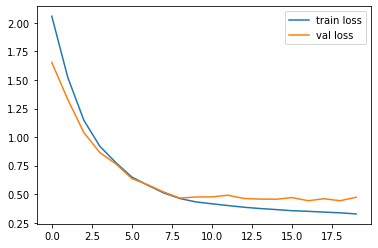

In [10]:
plot_curves(train_loss_relu, validation_loss_relu)

In [11]:
mlp_tanh = MLPClassifier(hidden_layer_sizes=(256, 32), activation='tanh', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_tanh, train_loss_tanh, validation_loss_tanh = train_model(mlp_tanh, 200)

filename = 'mlp_tanh.sav'
pickle.dump(mlp_tanh, open(f'Model_Saves/{filename}', 'wb'))

filename = 'mlp_tanh_losses.sav'
pickle.dump((train_loss_tanh, validation_loss_tanh), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_tanh = pickle.load(open('Model_Saves/mlp_tanh.sav', 'rb'))

# Load the losses
train_loss_tanh, validation_loss_tanh = pickle.load(open('Model_Saves/mlp_tanh_losses.sav', 'rb'))

print("Accuracy with Tanh Activation: ", mlp_tanh.score(testX, testy))

 10%|▉         | 19/200 [01:47<17:05,  5.67s/it]

Accuracy with Tanh Activation:  0.7083


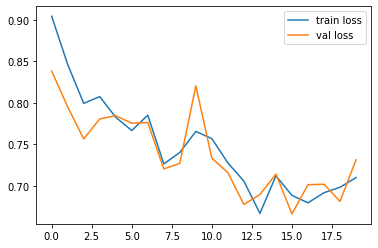

In [12]:
plot_curves(train_loss_tanh, validation_loss_tanh)

In [13]:
mlp_linear = MLPClassifier(hidden_layer_sizes=(256, 32), activation='identity', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_linear, train_loss_linear, validation_loss_linear = train_model(mlp_linear, 200)

# Save the model
filename = 'mlp_linear.sav'
pickle.dump(mlp_linear, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_linear_losses.sav'
pickle.dump((train_loss_linear, validation_loss_linear), open(f'Model_Saves/{filename}', 'wb'))

# Load the Model
mlp_linear = pickle.load(open('Model_Saves/mlp_linear.sav', 'rb'))

# Load the losses
train_loss_linear, validation_loss_linear = pickle.load(open('Model_Saves/mlp_linear_losses.sav', 'rb'))

print("Linear: ", mlp_linear.score(testX, testy))

 12%|█▏        | 23/200 [02:02<15:46,  5.35s/it]

Linear:  0.7959


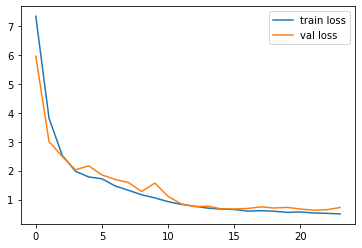

In [14]:
plot_curves(train_loss_linear, validation_loss_linear)

ReLU is the best activation function as it offers the highest accuracy while having a smoother loss and accuracy curves as compared to it's counterparts

## 2

In [17]:
mlp_lr_one_tenth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, learning_rate_init=0.1)

mlp_lr_one_tenth_relu, train_loss_lr_one_tenth_relu, validation_loss_lr_one_tenth_relu = train_model(mlp_lr_one_tenth_relu, 200)

# Save the model
filename = 'mlp_lr_one_tenth_relu.sav'
pickle.dump(mlp_lr_one_tenth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_lr_one_tenth_relu_losses.sav'
pickle.dump((train_loss_lr_one_tenth_relu, validation_loss_lr_one_tenth_relu), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_tenth_relu = pickle.load(open('Model_Saves/mlp_lr_one_tenth_relu.sav', 'rb'))

# Load the losses
train_loss_lr_one_tenth_relu, validation_loss_lr_one_tenth_relu = pickle.load(open('Model_Saves/mlp_lr_one_tenth_relu_losses.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.1: ", mlp_lr_one_tenth_relu.score(testX, testy))

  6%|▌         | 11/200 [01:02<17:55,  5.69s/it]

Accuracy with RELU Activation and Learning Rate of 0.1:  0.1


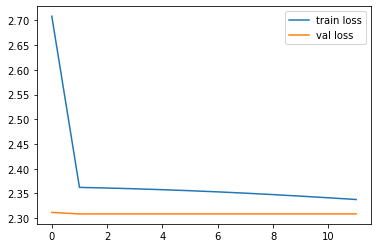

In [18]:
plot_curves(train_loss_lr_one_tenth_relu, validation_loss_lr_one_tenth_relu)

In [19]:
mlp_lr_one_hundredth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, learning_rate_init=0.01)

mlp_lr_one_hundredth_relu, train_loss_lr_one_hundredth_relu, validation_loss_lr_one_hundredth_relu = train_model(mlp_lr_one_hundredth_relu, 200)

# Save the model
filename = 'mlp_lr_one_hundredth_relu.sav'
pickle.dump(mlp_lr_one_hundredth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_lr_one_hundredth_relu_losses.sav'
pickle.dump((train_loss_lr_one_hundredth_relu, validation_loss_lr_one_hundredth_relu), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_hundredth_relu = pickle.load(open('Model_Saves/mlp_lr_one_hundredth_relu.sav', 'rb'))

# Load the losses
train_loss_lr_one_hundredth_relu, validation_loss_lr_one_hundredth_relu = pickle.load(open('Model_Saves/mlp_lr_one_hundredth_relu_losses.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.01: ", mlp_lr_one_hundredth_relu.score(testX, testy))

  6%|▌         | 11/200 [01:03<18:03,  5.73s/it]

Accuracy with RELU Activation and Learning Rate of 0.01:  0.1


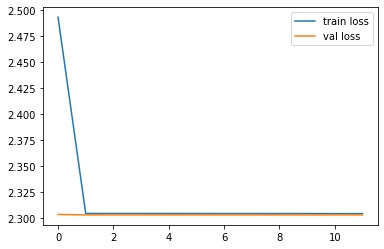

In [20]:
plot_curves(train_loss_lr_one_hundredth_relu, validation_loss_lr_one_hundredth_relu)

In [21]:
mlp_lr_one_thousandth_relu = MLPClassifier(hidden_layer_sizes=(256, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1, learning_rate_init=0.001)

mlp_lr_one_thousandth_relu, train_loss_lr_one_thousandth_relu, validation_loss_lr_one_thousandth_relu = train_model(mlp_lr_one_thousandth_relu, 200)

# Save the model
filename = 'mlp_lr_one_thousandth_relu.sav'
pickle.dump(mlp_lr_one_thousandth_relu, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_lr_one_thousandth_relu_losses.sav'
pickle.dump((train_loss_lr_one_thousandth_relu, validation_loss_lr_one_thousandth_relu), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_lr_one_thousandth_relu = pickle.load(open('Model_Saves/mlp_lr_one_thousandth_relu.sav', 'rb'))

# Load the losses
train_loss_lr_one_thousandth_relu, validation_loss_lr_one_thousandth_relu = pickle.load(open('Model_Saves/mlp_lr_one_thousandth_relu_losses.sav', 'rb'))

print("Accuracy with RELU Activation and Learning Rate of 0.001: ", mlp_lr_one_thousandth_relu.score(testX, testy))

 10%|▉         | 19/200 [01:46<16:51,  5.59s/it]

Accuracy with RELU Activation and Learning Rate of 0.001:  0.8512


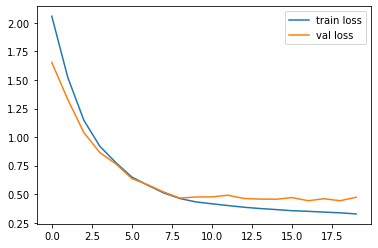

In [22]:
plot_curves(train_loss_lr_one_thousandth_relu, validation_loss_lr_one_thousandth_relu)

Learning Rate of 0.1 and 0.01 fail to converge while 0.001 performs best

## 3

In [23]:
mlp_64_64 = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_64_64, train_loss_64_64, validation_loss_64_64 = train_model(mlp_64_64, 200)

# Save the model
filename = 'mlp_64_64.sav'
pickle.dump(mlp_64_64, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_64_64_losses.sav'
pickle.dump((train_loss_64_64, validation_loss_64_64), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_64_64 = pickle.load(open('Model_Saves/mlp_64_64.sav', 'rb'))

# Load the losses
train_loss_64_64, validation_loss_64_64 = pickle.load(open('Model_Saves/mlp_64_64_losses.sav', 'rb'))

print("Accuracy with RELU Activation and 64-64 Neurons in Hidden Layers: ", mlp_64_64.score(testX, testy))

 10%|▉         | 19/200 [00:38<06:10,  2.05s/it]

Accuracy with RELU Activation and 64-64 Neurons in Hidden Layers:  0.8503


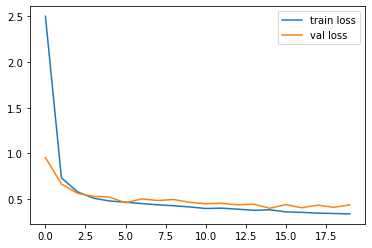

In [24]:
plot_curves(train_loss_64_64, validation_loss_64_64)

In [25]:
mlp_128_64 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_128_64, train_loss_128_64, validation_loss_128_64 = train_model(mlp_128_64, 200)

# Save the model
filename = 'mlp_128_64.sav'
pickle.dump(mlp_128_64, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_128_64_losses.sav'
pickle.dump((train_loss_128_64, validation_loss_128_64), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_64 = pickle.load(open('Model_Saves/mlp_128_64.sav', 'rb'))

# Load the losses
train_loss_128_64, validation_loss_128_64 = pickle.load(open('Model_Saves/mlp_128_64_losses.sav', 'rb'))

print("Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers: ", mlp_128_64.score(testX, testy))

  6%|▋         | 13/200 [00:44<10:32,  3.38s/it]

Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers:  0.8405


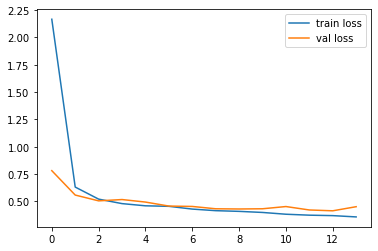

In [26]:
plot_curves(train_loss_128_64, validation_loss_128_64)

In [27]:
mlp_128_128 = MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_128_128, train_loss_128_128, validation_loss_128_128 = train_model(mlp_128_128, 200)

# Save the model
filename = 'mlp_128_128.sav'
pickle.dump(mlp_128_128, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_128_128_losses.sav'
pickle.dump((train_loss_128_128, validation_loss_128_128), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_128 = pickle.load(open('Model_Saves/mlp_128_128.sav', 'rb'))

# Load the losses
train_loss_128_128, validation_loss_128_128 = pickle.load(open('Model_Saves/mlp_128_128_losses.sav', 'rb'))

print("Accuracy with RELU Activation and 128-128 Neurons in Hidden Layers: ", mlp_128_128.score(testX, testy))

 10%|█         | 20/200 [01:12<10:56,  3.65s/it]

Accuracy with RELU Activation and 128-128 Neurons in Hidden Layers:  0.85


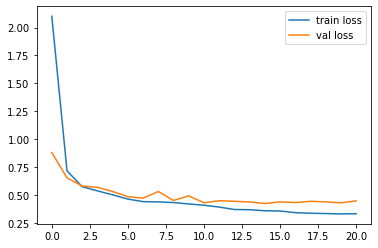

In [28]:
plot_curves(train_loss_128_128, validation_loss_128_128)

In [29]:
mlp_128_32 = MLPClassifier(hidden_layer_sizes=(128, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_128_32, train_loss_128_32, validation_loss_128_32 = train_model(mlp_128_32, 200)

# Save the model
filename = 'mlp_128_32.sav'
pickle.dump(mlp_128_32, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_128_32_losses.sav'
pickle.dump((train_loss_128_32, validation_loss_128_32), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_128_32 = pickle.load(open('Model_Saves/mlp_128_32.sav', 'rb'))

# Load the losses
train_loss_128_32, validation_loss_128_32 = pickle.load(open('Model_Saves/mlp_128_32_losses.sav', 'rb'))

print("Accuracy with RELU Activation and 128-32 Neurons in Hidden Layers: ", mlp_128_32.score(testX, testy))


 13%|█▎        | 26/200 [01:13<08:10,  2.82s/it]

Accuracy with RELU Activation and 128-32 Neurons in Hidden Layers:  0.8533


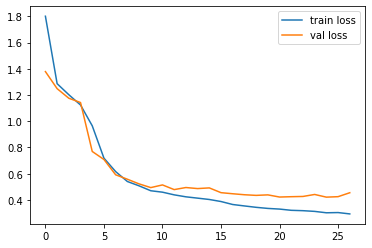

In [30]:
plot_curves(train_loss_128_32, validation_loss_128_32)

In [31]:
mlp_64_32 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', batch_size=64, validation_fraction=0.15, random_state=1)

mlp_64_32, train_loss_64_32, validation_loss_64_32 = train_model(mlp_64_32, 200)

# Save the model
filename = 'mlp_64_32.sav'
pickle.dump(mlp_64_32, open(f'Model_Saves/{filename}', 'wb'))

# Save the losses
filename = 'mlp_64_32_losses.sav'
pickle.dump((train_loss_64_32, validation_loss_64_32), open(f'Model_Saves/{filename}', 'wb'))

# Load the model
mlp_64_32 = pickle.load(open('Model_Saves/mlp_64_32.sav', 'rb'))

# Load the losses
train_loss_64_32, validation_loss_64_32 = pickle.load(open('Model_Saves/mlp_64_32_losses.sav', 'rb'))

print("Accuracy with RELU Activation and 64-32 Neurons in Hidden Layers: ", mlp_64_32.score(testX, testy))

  8%|▊         | 16/200 [00:30<05:50,  1.91s/it]

Accuracy with RELU Activation and 64-32 Neurons in Hidden Layers:  0.8336


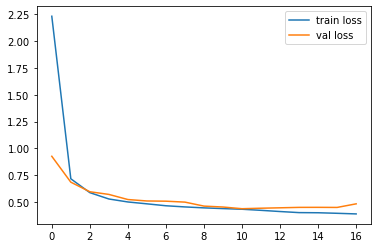

In [32]:
plot_curves(train_loss_64_32, validation_loss_64_32)

Hidden Layers of Sizes 128 and 64 work best for as per the experiments, hence they've been used for future experiments

## 4

In [33]:
# Cross Validation
from sklearn.model_selection import GridSearchCV
import os

# Create the parameter grid based on the results of random search
param_grid = {
    'hidden_layer_sizes': [(128, 64)],
    'activation': ['relu'],
    'batch_size': [64, 32],
    'solver': ['sgd', 'adam', 'lbfgs'],
    'validation_fraction': [0.15],
    'random_state': [1],
    'early_stopping': [True],
    'learning_rate_init': [0.001, 0.0001]
}

# Create a based model
mlp = MLPClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, n_jobs=os.cpu_count()//3, cv=[(slice(None), slice(None))], verbose = 2)

# Fit the grid search to the data
grid_search.fit(trainX, trainy)

# Save the model
filename = 'mlp_grid_search.sav'
pickle.dump(grid_search, open(f'Model_Saves/{filename}', 'wb'))

# Load the model
grid_search = pickle.load(open('Model_Saves/mlp_grid_search.sav', 'rb'))

mlp = grid_search.best_estimator_

print("Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers: ", mlp.score(testX, testy))

grid_search.best_params_, grid_search.best_score_

Accuracy with RELU Activation and 128-64 Neurons in Hidden Layers:  0.8751


({'activation': 'relu',
  'batch_size': 32,
  'early_stopping': True,
  'hidden_layer_sizes': (128, 64),
  'learning_rate_init': 0.0001,
  'random_state': 1,
  'solver': 'adam',
  'validation_fraction': 0.15},
 0.9403666666666667)

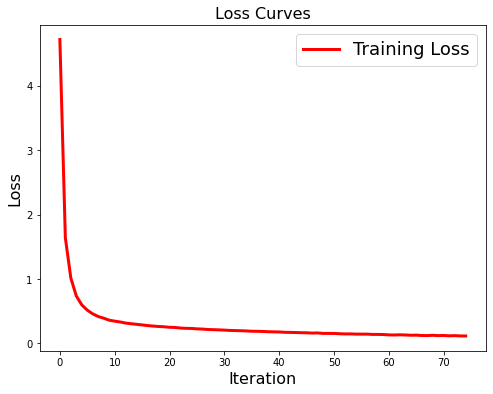

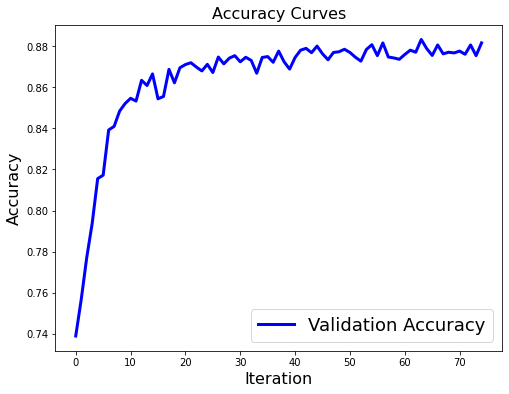

In [32]:
plot_curves(mlp)